<a href="https://colab.research.google.com/github/orzuk/ElectionsDataAnalysis/blob/main/ReadElectionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2020 elections results

In [55]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames



First, we need to mount our local drive to the colab network

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading elections 2020 elections data:


In [57]:
from google.colab import files
uploaded = files.upload()

Saving votes per city 2020.csv to votes per city 2020 (3).csv


In [48]:
import io
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# Dataset is now stored in a Pandas Dataframe
print(df_2020_raw.columns)
df_2020_raw.head()

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ג',
       'ודעם', 'ז', 'זך', 'זץ', 'טב', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כן', 'ל', 'מחל', 'נ', 'נז', 'ני', 'נץ', 'נק', 'פה', 'ףז', 'ץ', 'ק',
       'קי', 'קך', 'קץ', 'שס', 'Unnamed: 37'],
      dtype='object')


,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,967,2018,595,6,589,13,0,554,0,0,0,0,0,1,0,0,0,0,0,1,1,4,0,1,0,0,0,8,2,0,0,0,0,2,2,NaN
אבו גוש,2,472,4821,2718,36,2682,75,4,2157,0,0,0,5,0,0,5,1,0,1,0,0,5,280,0,0,0,3,2,123,0,2,0,0,1,4,14,NaN
אבו סנאן,6,473,9422,6090,53,6037,92,6,4458,0,1,0,16,1,2,13,2,0,1,1,2,230,190,3,2,1,3,3,752,0,2,2,1,2,4,247,NaN
אבו עבדון שבט,18,958,142,41,1,40,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
אבו קורינאת שבט,18,968,3037,1336,8,1328,9,0,1263,0,0,0,1,0,0,3,0,0,1,0,0,0,8,0,1,2,1,0,33,0,2,1,0,2,1,0,NaN


In [54]:
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2020".format(df_2020_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')



327702 votes in March 2020 מעטפות חיצוניות 


In [52]:
print(df_2020_raw.columns)
df_2020.head()


Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ג',
       'ודעם', 'ז', 'זך', 'זץ', 'טב', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כן', 'ל', 'מחל', 'נ', 'נז', 'ני', 'נץ', 'נק', 'פה', 'ףז', 'ץ', 'ק',
       'קי', 'קך', 'קץ', 'שס', 'Unnamed: 37'],
      dtype='object')


,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,13,0,554,0,0,0,0,0,1,0,0,0,0,0,1,1,4,0,1,0,0,0,8,2,0,0,0,0,2,2
אבו גוש,75,4,2157,0,0,0,5,0,0,5,1,0,1,0,0,5,280,0,0,0,3,2,123,0,2,0,0,1,4,14
אבו סנאן,92,6,4458,0,1,0,16,1,2,13,2,0,1,1,2,230,190,3,2,1,3,3,752,0,2,2,1,2,4,247
אבו עבדון שבט,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
אבו קורינאת שבט,9,0,1263,0,0,0,1,0,0,3,0,0,1,0,0,0,8,0,1,2,1,0,33,0,2,1,0,2,1,0


In [51]:
df_2020.describe()


,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.0,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000
mean,220.329489,226.060132,479.000824,3.114498,0.172982,0.0,198.261120,0.253707,0.281713,0.557661,0.182867,0.320428,0.223229,0.425041,0.668863,216.939868,1114.043657,2.284185,0.549423,0.288303,15.981878,0.512356,1005.256178,1.213344,0.504119,0.807249,0.364086,0.557661,1.132619,290.653213
std,1493.634165,2577.916666,2217.089009,23.027370,0.976928,0.0,1157.402854,1.675648,1.991667,2.430817,0.922113,1.745647,1.215625,2.680988,3.342855,1264.164111,5912.059471,12.660412,3.025113,1.618905,86.375346,2.181258,5936.253846,13.314874,2.672797,4.035181,1.688200,2.445694,5.188742,1945.288573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.500000,1.500000,2.000000,0.000000,0.000000,0.0,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,73.000000,0.000000,0.000000,0.000000,1.000000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,98.750000,6.000000,7.000000,1.000000,0.000000,0.0,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,190.000000,1.000000,0.000000,0.000000,4.000000,0.000000,290.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
max,38808.000000,63782.000000,33145.000000,623.000000,18.000000,0.0,27357.000000,29.000000,57.000000,36.000000,13.000000,35.000000,25.000000,59.000000,58.000000,19414.000000,107049.000000,266.000000,66.000000,37.000000,1784.000000,46.000000,128637.000000,441.000000,55.000000,79.000000,27.000000,47.000000,87.000000,44649.000000


In [33]:
df_2020.iloc[5]

אמת              9.0
ג                0.0
ודעם           264.0
ז                0.0
זך               0.0
זץ               0.0
טב               1.0
י                0.0
יז               0.0
ינ               0.0
יף               0.0
יק               0.0
יר               0.0
כ                0.0
כן               0.0
ל                0.0
מחל              3.0
נ                0.0
נז               0.0
ני               0.0
נץ               0.0
נק               0.0
פה              52.0
ףז               0.0
ץ                2.0
ק                0.0
קי               0.0
קך               0.0
קץ               0.0
שס               0.0
Unnamed: 37      NaN
Name: אבו קרינאת יישוב, dtype: float64

In [34]:
df_2020.loc['הרצליה']

אמת             4796.0
ג                675.0
ודעם             235.0
ז                 58.0
זך                 3.0
זץ                 0.0
טב              1548.0
י                  1.0
יז                 1.0
ינ                 1.0
יף                 3.0
יק                 2.0
יר                 6.0
כ                  7.0
כן                 6.0
ל               2301.0
מחל            14894.0
נ                 43.0
נז                 9.0
ני                 2.0
נץ               116.0
נק                 2.0
פה             28206.0
ףז                12.0
ץ                  4.0
ק                  5.0
קי                 3.0
קך                 3.0
קץ                13.0
שס              1878.0
Unnamed: 37        NaN
Name: הרצליה, dtype: float64

Now let's do some plotting

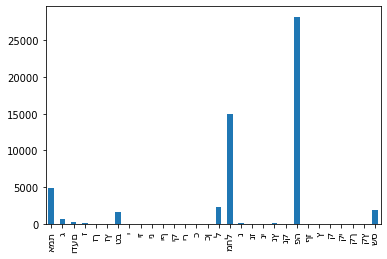

In [61]:
from matplotlib import pyplot as plt
df_2020.loc['הרצליה'].plot.bar()

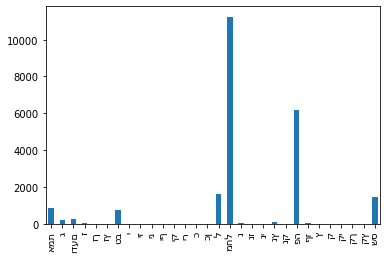

In [62]:
df_2020.loc['אילת'].plot.bar()

Next, we create a function for showing a bar plot of the voting **percentage** in a given city, while showing only the parties above a % threshold 

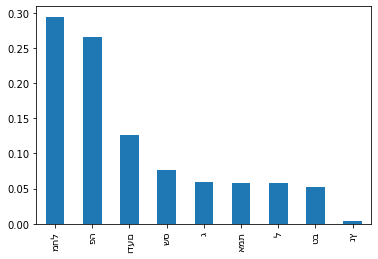

In [67]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2020, 0.001)  # total votes for each party
total_votes.plot.bar()



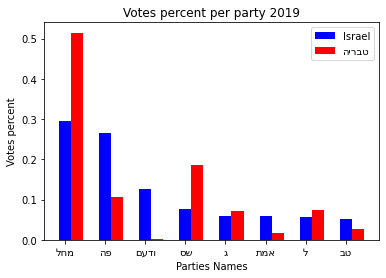

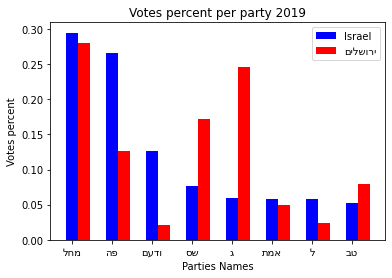

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f56d7e81978>)

In [42]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax


party_bar(df_2020, 0.0325, 'טבריה')
party_bar(df_2020, 0.0325, 'ירושלים')

Including additional source files

In [14]:
from google.colab import files
src = list(files.upload().values())[0]


Saving election_functions.py to election_functions (1).py
